
<div style="color:white;
           display:fill;
           border-radius:20px;
           background-color:#F5DEB3;
           font-size:170%;
           font-family:Helvetica, Sans-Serif;
           letter-spacing:0.5px">
<p style="padding: 10px;
          text-align: center;
          font-size:150%;
          color:blue;">
          🐥🎯NLP: Twitter Sentiment Analysis and Application🐥🎯
            
</p>
<style>
        h1{text-align: center;}
</style>  
    
</div>
​
<p style="font-family:cursive; font-size:15px; color:'darkcyan';">I brewed this notebook from scratch, If this notebook helped, please consider upvoting and cite me if sharing ,Thank you!</p>
<p style="width: 250px;padding: 15px;background: papayawhip;border-radius:10px;font-size:15px;border-radius:20px">
    <a href="https://www.linkedin.com/in/tusharaggarwalinseec/" target="_blank">Lets connect on LinkedIn!</a>
    
   </p>
<p style="width: 250px;padding: 15px;background: papayawhip;border-radius:10px;font-size:15px;border-radius:20px">
<a href="https://github.com/tushar2704" target="_blank">Follow me on Github too!</a> </p>
<p style="width:270px;padding: 15px;background: papayawhip;border-radius:10px;font-size:15px;border-radius:20px">
    <a href="https://medium.com/@tushar_aggarwal" target="_blank">Also checkout my Medium posts!</a>
    
   </p>
​


<div class="alert alert-info" role="alert" style="font-size:17px;border-radius:20px">
    <b>In this notebook, I am building a model to predict sentiment from thousands of tweets</b>
    
  </div>
  <p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:25px;border-radius:20px">
    <b>🐥🎯NLP: Twitter Sentiment Analysis🐥🎯</b>
</p>
 

<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:20px;border-radius:20px">
    <b>Importing the required packages</b>

In [1]:
#Data manipulation imports
import numpy as np
import pandas as pd

#Data Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Modeling imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pickle

#Additional imports
import nltk, re, string
from nltk.corpus import stopwords, twitter_samples

<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:20px;border-radius:20px">
    <b>Loading and checking the data</b>

In [2]:
#Loading and printing head of df
tweet =pd.read_csv("/kaggle/input/nlptwitter/twitter.csv",index_col=None)
tweet.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [3]:
#Chekcing summary of the tweet df
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [4]:
#Checking for statistical info
tweet.describe(include='O')

,tweet
count,31962
unique,29530
top,#model i love u take with u all the time in ...
freq,319


In [5]:
#Dropping redundant columns
tweet = tweet.drop(['id'], axis=1)
tweet.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:20px;border-radius:20px">
    <b>Some EDA</b>

label    0
tweet    0
dtype: int64

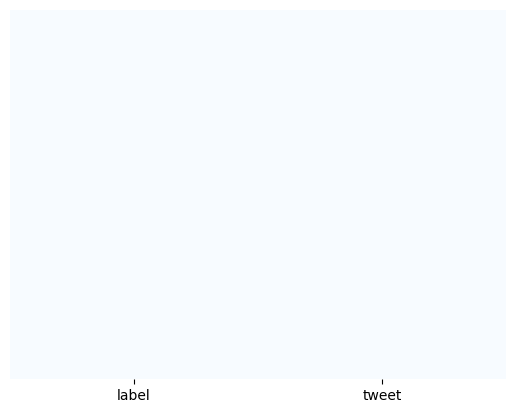

In [6]:
#Heatmap to find isnull
sns.heatmap(tweet.isnull(),yticklabels=False, cbar=False,cmap='Blues' )
#or
tweet.isna().sum().sort_values(ascending=False)

0    29720
1     2242
Name: label, dtype: int64


<AxesSubplot:xlabel='label', ylabel='count'>

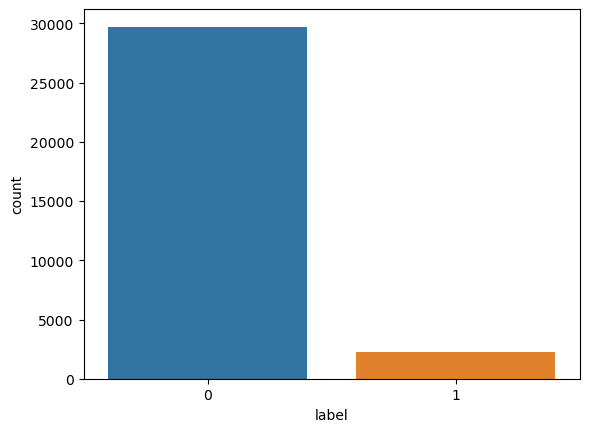

In [7]:
#Checking the balance of the Target variable
print(tweet['label'].value_counts())

#or
#Countplot for target valiable
sns.countplot(x='label', data=tweet, label='Count')

<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:20px;border-radius:20px">
    <b>Data Wrangling</b>

In [8]:
#Preprocessing the tweets data

def process_tweet(tweet):
    stemmer = nltk.PorterStemmer()
    stopwords_english = stopwords.words('english')
    tweet = re.sub(r'\$\w*', '', tweet)
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    tweet = re.sub(r'#', '', tweet)
    tokenizer = nltk.TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and
                word not in string.punctuation):
            stem_word = stemmer.stem(word)  # stemming word
            tweets_clean.append(stem_word)

    return tweets_clean

In [9]:
#Defining build_freqa for feature varibale frequencies

def build_freqs(tweets, ys):
    """Build frequencies.
    Input:
        tweets: a list of tweets
        ys: an m x 1 array with the sentiment label of each tweet
            (either 0 or 1)
    Output:
        freqs: a dictionary mapping each (word, sentiment) pair to its
        frequency
    """
    
    yslist = np.squeeze(ys).tolist()

    
    freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in process_tweet(tweet):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1

    return freqs

In [10]:
nltk.download('twitter_samples')
nltk.download('stopwords')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
#Setting positive and negatives 

pos_tweets = twitter_samples.strings('positive_tweets.json')
neg_tweets = twitter_samples.strings('negative_tweets.json')

<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:20px;border-radius:20px">
    <b>Training and Model Evaluating</b>

In [12]:
#Splitting into training and testing sets
train_pos = pos_tweets[:4000]
test_pos = pos_tweets[4000:]
train_neg =neg_tweets[:4000]
test_neg = neg_tweets[4000:]

#combining
X_train =train_pos +train_neg
X_test =test_pos+test_neg

In [13]:
#Combining negative and positive labes

y_train = np.append(np.ones((len(train_pos), 1)), np.zeros((len(train_neg), 1)), axis=0)
y_test = np.append(np.ones((len(test_pos), 1)), np.zeros((len(test_neg), 1)), axis=0)

In [14]:
#Creating freq dictionary
freq = build_freqs(X_train, y_train)

In [15]:
#Checking for out the output

print("type(freq) = " + str(type(freq)))
print("len(freq) = " + str(len(freq.keys())))

type(freq) = <class 'dict'>
len(freq) = 11337


In [16]:
#testing the function below

print('This is an example of a positive tweet: \n', X_train[22])
print('\nThis is an example of the processed version of the tweet: \n', process_tweet(X_train[22]))

This is an example of a positive tweet: 
 @gculloty87 Yeah I suppose she was lol! Chat in a bit just off out x :))

This is an example of the processed version of the tweet: 
 ['yeah', 'suppos', 'lol', 'chat', 'bit', 'x', ':)']


In [17]:
#  Logistic regression

# Sigmoid Function
def sigmoid(z):
    """
    Input:
        z: is the input (can be a scalar or an array)
    Output:
        h: the sigmoid of z
    """
    zz = np.negative(z)
    h = 1 / (1 + np.exp(zz))
    return h

In [18]:
# Cost function and Gradient
def gradientDescent(x, y, theta, alpha, num_iters):
    """
    Input:
        x: matrix of features which is (m,n+1)
        y: corresponding labels of the input matrix x, dimensions (m,1)
        theta: weight vector of dimension (n+1,1)
        alpha: learning rate
        num_iters: number of iterations you want to train your model for
    Output:
        J: the final cost
        theta: your final weight vector
    Hint: you might want to print the cost to make sure that it is going down.
    """
    # get 'm', the number of rows in matrix x
    m = x.shape[0]
    for i in range(0, num_iters):
        z = np.dot(x, theta)
        h = sigmoid(z)
        # calculate the cost function
        cost = -1. / m * (np.dot(y.transpose(), np.log(h)) + np.dot((1 - y).transpose(), np.log(1 - h)))
        # update the weights theta
        theta = theta - (alpha / m) * np.dot(x.transpose(), (h - y))

    cost = float(cost)
    return cost, theta

In [19]:
#  Extracting the features

def extract_features(tweet, freqs):
    """
    Input:
        tweet: a list of words for one tweet
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
    Output:
        x: a feature vector of dimension (1,3)
    """

    word_l = process_tweet(tweet)
    x = np.zeros((1, 3))

    # bias term is set to 1
    x[0, 0] = 1

    for word in word_l:
        # increment the word count for the positive label 1
        x[0, 1] += freqs.get((word, 1.0), 0)
        # increment the word count for the negative label 0
        x[0, 2] += freqs.get((word, 0.0), 0)

    assert (x.shape == (1, 3))
    return x

In [20]:
# test on training data

tmp1 = extract_features(X_train[22], freq)
print(tmp1)

[[1.000e+00 3.006e+03 1.240e+02]]


In [21]:
# Training the Model

# collect the features 'x' and stack them into a matrix 'X'
X = np.zeros((len(X_train), 3))
for i in range(len(X_train)):
    X[i, :] = extract_features(X_train[i], freq)

# training labels corresponding to X
Y = y_train

# Apply gradient descent
# these values are predefined (Andrew NG)
J, theta = gradientDescent(X, Y, np.zeros((3, 1)), 1e-9, 1500)

In [22]:
def predict_tweet(tweet, freq, theta):
    """
    Input:
        tweet: a string
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
        theta: (3,1) vector of weights
    Output:
        y_pred: the probability of a tweet being positive or negative
    """
    # extract the features of the tweet and store it into x
    x = extract_features(tweet, freq)
    y_pred = sigmoid(np.dot(x, theta))

    return y_pred

In [23]:
def test_logistic_regression(X_test, y_test, freq, theta):
    """
    Input:
        test_x: a list of tweets
        test_y: (m, 1) vector with the corresponding labels for the list of tweets
        freqs: a dictionary with the frequency of each pair (or tuple)
        theta: weight vector of dimension (3, 1)
    Output:
        accuracy: (# of tweets classified correctly) / (total # of tweets)
    """
    # the list for storing predictions
    y_hat = []

    for tweet in X_test:
        # get the label prediction for the tweet
        y_pred = predict_tweet(tweet, freq, theta)
        if y_pred > 0.5:
            y_hat.append(1)
        else:
            y_hat.append(0)

    accuracy = (y_hat == np.squeeze(y_test)).sum() / len(X_test)

    return accuracy

In [24]:
tmp_accuracy = test_logistic_regression(X_test, y_test, freq, theta)
print(f"Logistic regression model's accuracy = {tmp_accuracy:.4f}")

Logistic regression model's accuracy = 0.9950


In [25]:
# Predict with your own tweet

def pre(sentence):
    yhat = predict_tweet(sentence, freq, theta)
    if yhat > 0.5:
        return 'Positive sentiment'
    elif yhat == 0:
        return 'Neutral sentiment'
    else:
        return 'Negative sentiment'